In [ ]:
!pip install sentence-transformers

In [ ]:
import ast, tokenize, io, os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sentence_transformers import SentenceTransformer
from IPython.display import Image, display


In [ ]:
snippets = [
    {"id": "snippet_01", "code": "def add(a, b):\n    return a + b"},

    {"id": "snippet_02", "code": """class Counter:
    def __init__(self):
        self.count = 0

    def inc(self):
        self.count += 1

    def get(self):
        return self.count"""},

    {"id": "snippet_03", "code": """import math

def circle_area(r):
    return math.pi * r * r"""},

    {"id": "snippet_04", "code": """def fib(n):
    if n <= 1:
        return n
    return fib(n-1) + fib(n-2)"""},

    {"id": "snippet_05", "code": """def read_lines(path):
    try:
        with open(path) as f:
            return f.readlines()
    except FileNotFoundError:
        return []"""},

    {"id": "snippet_06", "code": """square = lambda x: x * x

def squares(arr):
    return [square(x) for x in arr]"""},

    {"id": "snippet_07", "code": """def timer(fn):
    import time
    def wrapper(*a, **k):
        s = time.time()
        r = fn(*a, **k)
        print("Elapsed:", time.time() - s)
        return r
    return wrapper"""},

    {"id": "snippet_08", "code": """def gen(n):
    i = 0
    while i < n:
        yield i
        i += 1"""},

    {"id": "snippet_09", "code": """def make_adder(x):
    def add(y):
        return x + y
    return add"""},

    {"id": "snippet_10", "code": """class Graph:
    def __init__(self):
        self.adj = {}

    def add_edge(self, u, v):
        self.adj.setdefault(u, []).append(v)

    def dfs(self, start):
        seen = set()
        stack = [start]
        while stack:
            node = stack.pop()
            if node in seen:
                continue
            seen.add(node)
            for nb in self.adj.get(node, []):
                stack.append(nb)
        return seen"""}
]


In [ ]:
parsed_data = []

for snip in snippets:
    tree = ast.parse(snip["code"])
    functions = [n.name for n in ast.walk(tree) if isinstance(n, ast.FunctionDef)]
    classes = [n.name for n in ast.walk(tree) if isinstance(n, ast.ClassDef)]
    imports = [n.names[0].name for n in ast.walk(tree) if isinstance(n, ast.Import)]
    tokens = [tok.string for tok in tokenize.generate_tokens(io.StringIO(snip["code"]).readline)]

    parsed_data.append({
        "id": snip["id"],
        "code": snip["code"],
        "functions": functions,
        "classes": classes,
        "imports": imports,
        "tokens_preview": tokens[:15]
    })

df = pd.DataFrame(parsed_data)
df


,id,code,functions,classes,imports,tokens_preview
0,snippet_01,"def add(a, b):\n return a + b",[add],[],[],"[def, add, (, a, ,, b, ), :, \n, , return,..."
1,snippet_02,class Counter:\n def __init__(self):\n ...,"[__init__, inc, get]",[Counter],[],"[class, Counter, :, \n, , def, __init__, (..."
2,snippet_03,import math\n\ndef circle_area(r):\n return...,[circle_area],[],[math],"[import, math, \n, \n, def, circle_area, (, r,..."
3,snippet_04,def fib(n):\n if n <= 1:\n return n\...,[fib],[],[],"[def, fib, (, n, ), :, \n, , if, n, <=, 1,..."
4,snippet_05,def read_lines(path):\n try:\n with ...,[read_lines],[],[],"[def, read_lines, (, path, ), :, \n, , try..."
5,snippet_06,square = lambda x: x * x\n\ndef squares(arr):\...,[squares],[],[],"[square, =, lambda, x, :, x, *, x, \n, \n, def..."
6,snippet_07,def timer(fn):\n import time\n def wrapp...,"[timer, wrapper]",[],[time],"[def, timer, (, fn, ), :, \n, , import, ti..."
7,snippet_08,def gen(n):\n i = 0\n while i < n:\n ...,[gen],[],[],"[def, gen, (, n, ), :, \n, , i, =, 0, \n, ..."
8,snippet_09,def make_adder(x):\n def add(y):\n r...,"[make_adder, add]",[],[],"[def, make_adder, (, x, ), :, \n, , def, a..."
9,snippet_10,class Graph:\n def __init__(self):\n ...,"[__init__, add_edge, dfs]",[Graph],[],"[class, Graph, :, \n, , def, __init__, (, ..."


In [ ]:
models = {
    "MiniLM": SentenceTransformer('all-MiniLM-L6-v2'),
    "DistilRoBERTa": SentenceTransformer('distilroberta-base'),
    "MPNet": SentenceTransformer('all-mpnet-base-v2')
}

embeddings = {}
for mname, model in models.items():
    print(f"Encoding with {mname}...")
    embeddings[mname] = model.encode([s["code"] for s in snippets], show_progress_bar=True)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Encoding with MiniLM...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Encoding with DistilRoBERTa...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Encoding with MPNet...


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

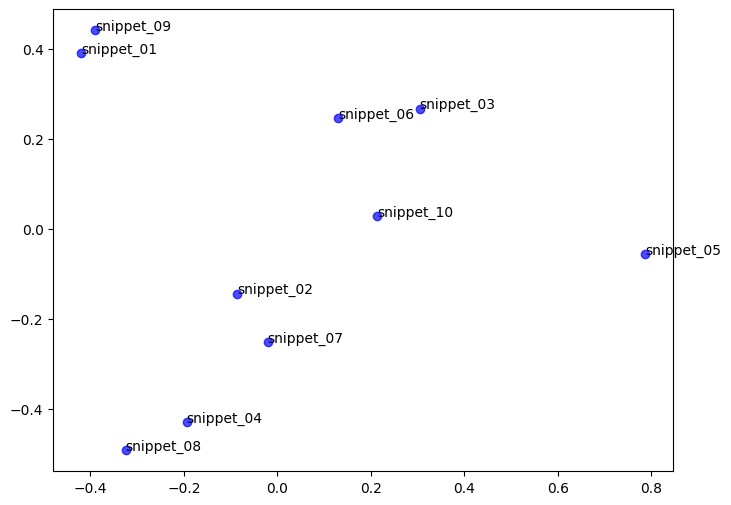

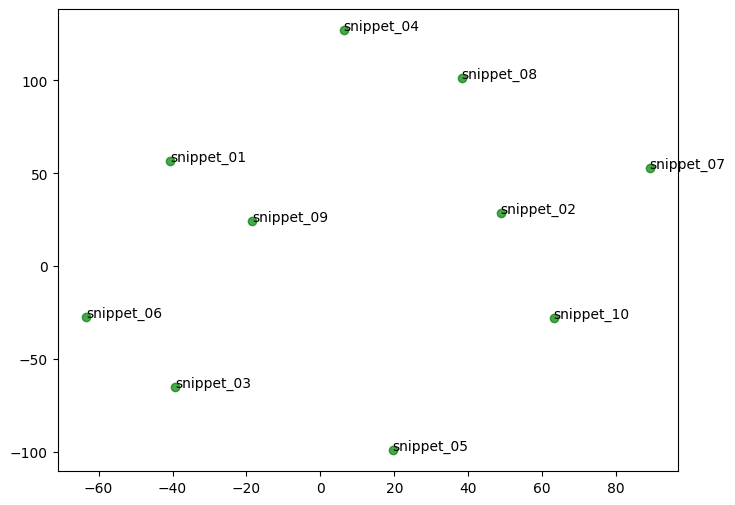

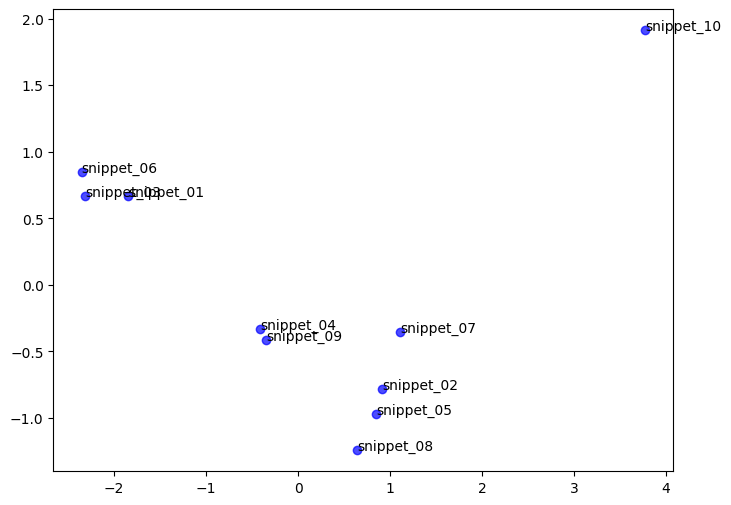

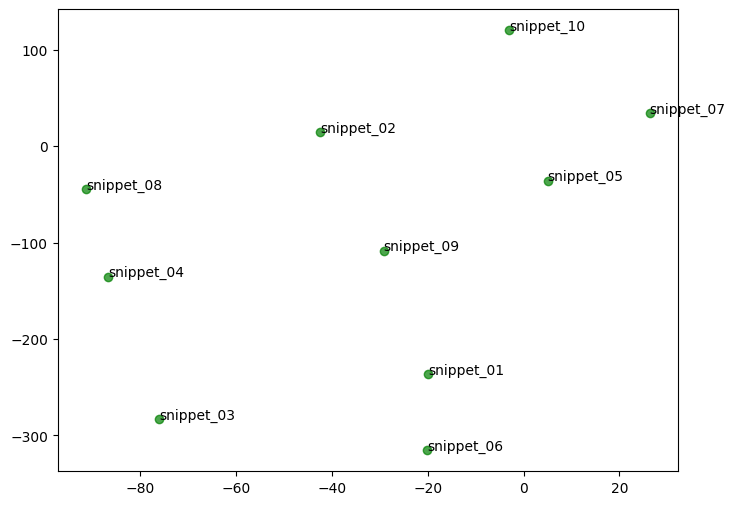

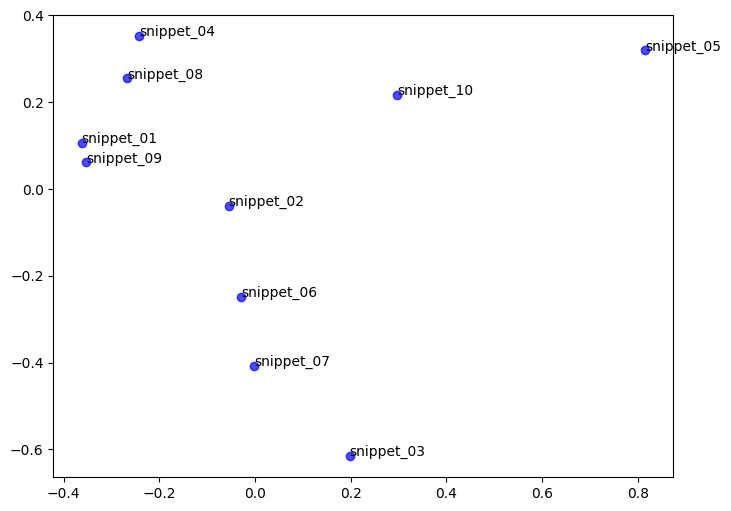

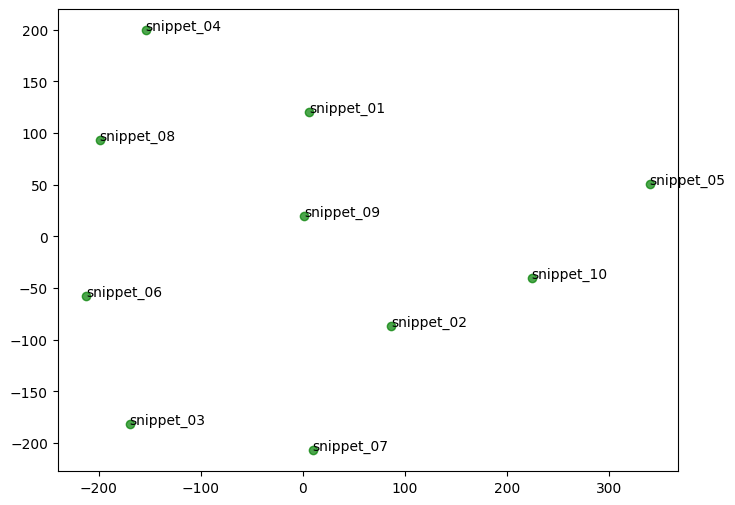

All plots saved to: results


In [ ]:
output_dir = "results"
os.makedirs(output_dir, exist_ok=True)

for mname in embeddings:
    emb = embeddings[mname]
    n = emb.shape[0]

    # PCA
    pca = PCA(n_components=2)
    coords_pca = pca.fit_transform(emb)
    plt.figure(figsize=(8,6))
    plt.scatter(coords_pca[:,0], coords_pca[:,1], c='blue', alpha=0.7)
    for i, txt in enumerate(df['id']):
        plt.annotate(txt, (coords_pca[i,0], coords_pca[i,1]))
    ppath = os.path.join(output_dir, f'pca_{mname}.png')
    plt.savefig(ppath, bbox_inches='tight')
    plt.show()
    plt.close()

    # t-SNE (safe perplexity for small dataset)
    perp = max(2, min(5, n-1))
    tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate=200, perplexity=perp)
    coords_tsne = tsne.fit_transform(emb)
    plt.figure(figsize=(8,6))
    plt.scatter(coords_tsne[:,0], coords_tsne[:,1], c='green', alpha=0.7)
    for i, txt in enumerate(df['id']):
        plt.annotate(txt, (coords_tsne[i,0], coords_tsne[i,1]))
    tpath = os.path.join(output_dir, f'tsne_{mname}.png')
    plt.savefig(tpath, bbox_inches='tight')
    plt.show()
    plt.close()

print("All plots saved to:", output_dir)


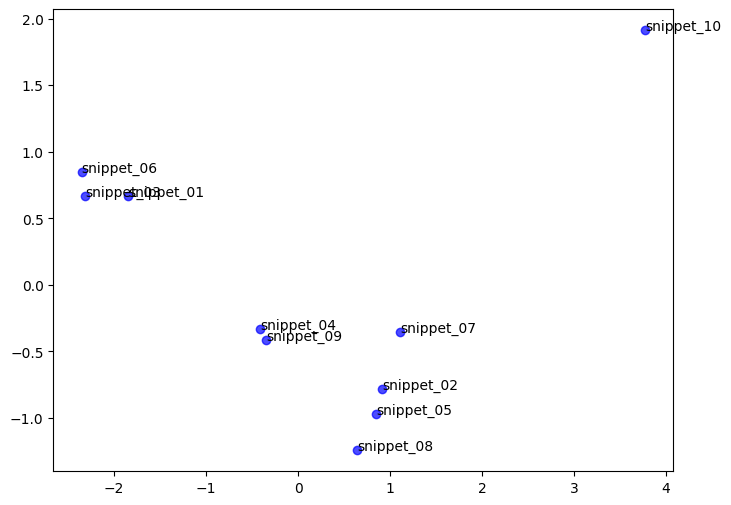

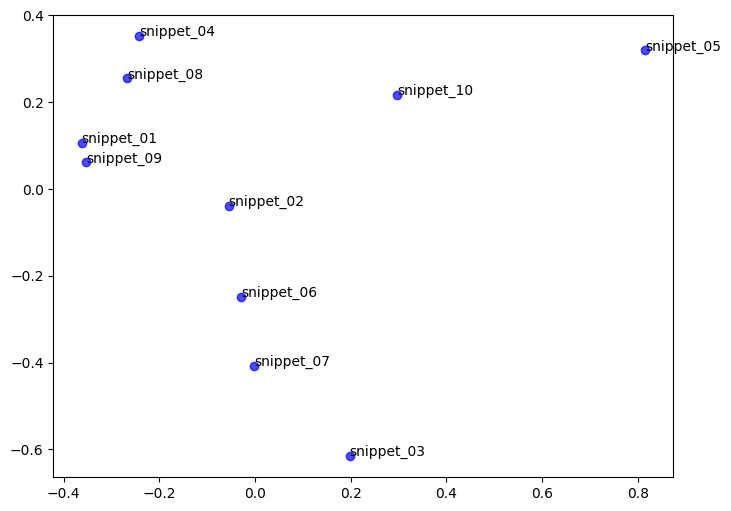

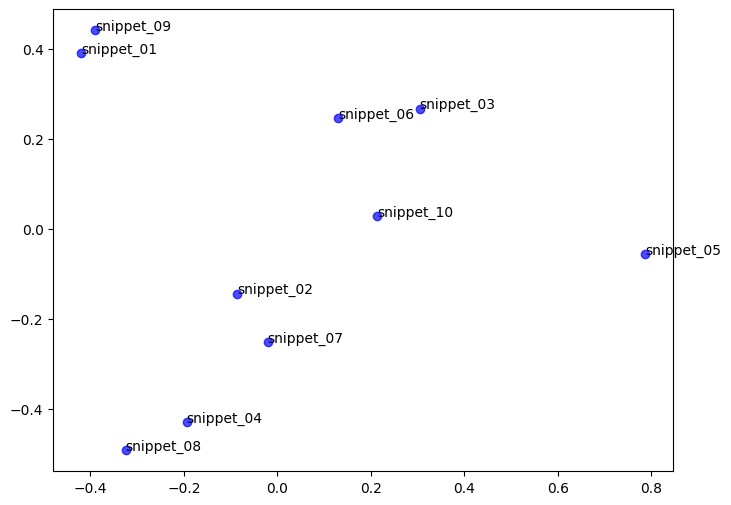

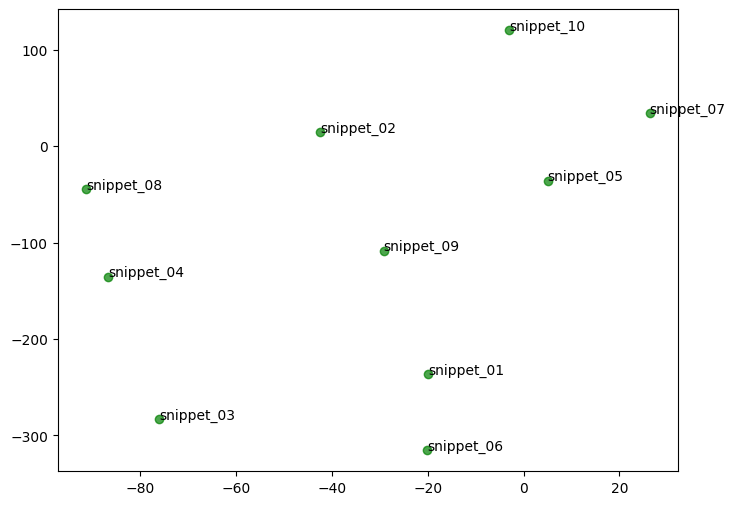

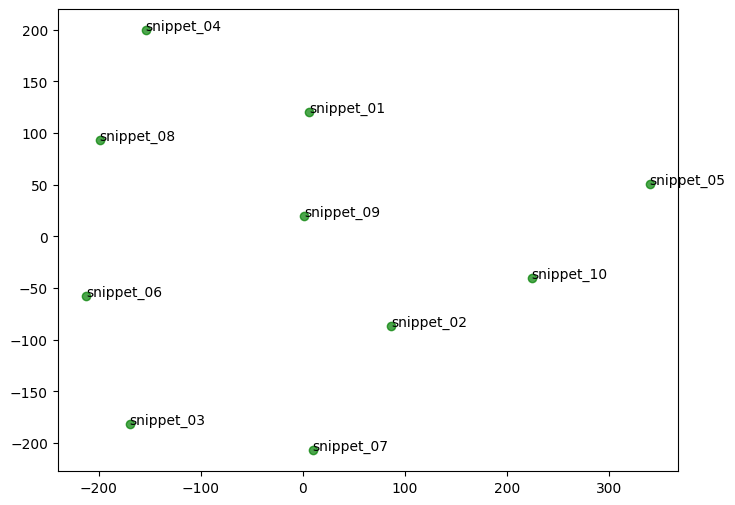

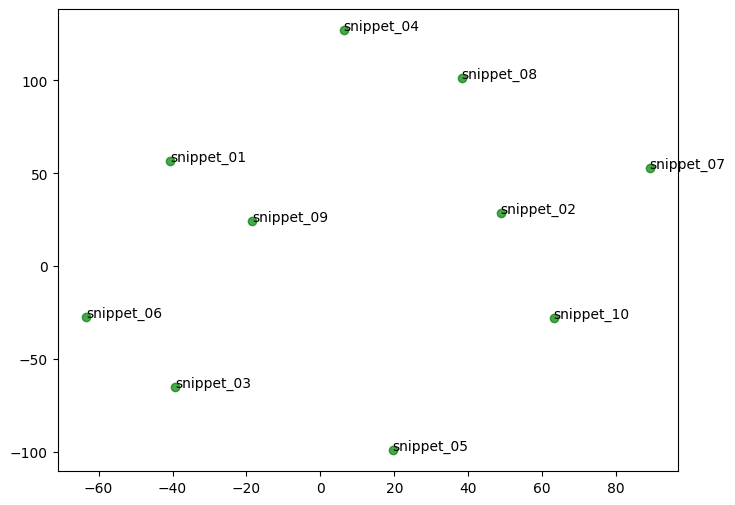

In [ ]:
for f in sorted(os.listdir("results")):
    display(Image(os.path.join("results", f)))
